In [363]:
import sys, os
#sys.path.append("C:\Users\Miguel\Desktop\Working_Space\pygeomod\pygeomod")
#import geoPyMC
import pymc as pm
import numpy as np
#import geogrid
import pandas as pn
import matplotlib.pyplot as plt
#reload (geoPyMC)
%matplotlib inline
from IPython.core.pylabtools import figsize

In [364]:
# Init

# Esto es para cargar el hdf5 con un modulo que hice en mi tesis. Tu cargalo como sea en pymc
#GeoPlot = geoPyMC.GeoPyMC_rep("Example plotting")

# Loading data base
#GeoPlot.load_db("I:\Sandstone paper database/","27thJulnothing2.hdf5",#"27thJulnothing2.hdf5",,#,#"21stJulAll.hdf5",  "18thJulgrav.hdf5"
#               verbose = 1)

#M = pm.database.hdf5.load('./input_data/Traces/post_model_150_30-350_30-250_20_1000iter50burn.hdf5')
M = pm.database.hdf5.load('./input_data/Traces/post_model_300_30-050_10-400_40_1000iter50burn.hdf5')
#M = pm.database.hdf5.load('./input_data/Traces/post_model_300_30-400_40_050_10_1000iter50burn.hdf5')
#M = pm.database.hdf5.load('./input_data/Traces/post_M-150-20_300-30_250-25_SSF1.5-0.5_1000iter50burn.hdf5')
#M = pm.database.hdf5.load('./input_data/Traces/post_M-NoTHL_SSF3-0.3_1000iter50burn.hdf5')


In [365]:
secres_top_unc_trace = M.trace('z_unc_secres_top')[:]
seal_top_unc_trace = M.trace('z_unc_seal_top')[:]
res_top_unc_trace = M.trace('z_unc_res_top')[:]
base_top_unc_trace = M.trace('z_unc_base_top')[:]
offset_unc_trace = M.trace('offset_unc')[:]
fault_sealing_trace = M.trace('fault_sealing_unc')[:]
structural_model_trace = M.trace('structural_model')[:] 
interp_trace = M.trace('interp_unc')[:]
#fw_res_th_trace = M.trace('res_th')[:]
#fw_seal_th_trace = M.trace('seal_th')[:]
#fw_sec_res_th_trace = M.trace('sec_res_th')[:]

max_volume_trace = structural_model_trace[:,0]
SSF_trace = structural_model_trace[:,1]
trap_control_trace = structural_model_trace[:,2]

In [366]:
len(max_volume_trace)

1000

In [367]:
# Import priors (exported with the method export priors during the simulation)

# Esto deberia dar igual. Era solo para hacer plots de la posterior y la prior juntas
#rom the data base the variables that can be plotted

#GeoPlot._select_trace()
#GeoPlot._plot_traces

#M_L1._select_trace()
#M_L1._plot_traces

#scores = pm.geweke(res_top_unc_trace, intervals=20)
#pm.Matplot.geweke_plot(scores, "score")

In [368]:
#M.trace_names

In [369]:
# Init un dataframe para un plot de las figuras
traces = pn.DataFrame()

# init un datafame para el plot geweke
geweke = pn.DataFrame()

In [370]:
# Aqui estoy mirando que priors quiero para el plot
#GeoPlot._plot_traces[::6]

In [377]:
M.trace_names[0]
a = ['offset_unc', 'z_unc_base_top',
 'z_unc_res_top',
 'z_unc_seal_top',
 'z_unc_secres_top']
b = ['Fault offset', 'Basement top', 'Reservoir top', 'Seal top', 'Sandstone 2 top']

In [378]:
#M.trace('z_unc_res_top', chain=None)[:]

In [379]:
# A ver, aqui viene el turron. Aqui loopeo cada trace. Basicamente sera una lista con los valores de tu posterior
# por cada parametro

# IMPORTANTE. Aqui loopeo la lista con los nombre de los posterior. i es una string con el nombre del posterior!!
for i in a:
    # Esto devuelve una np array con los posteriors. En tu caso sera similar
    t = M.trace(i, chain=None)[:]
    # Aqui guardo el posterior en la dataframe para la figura de las traces
    traces[i] = t
    try:
        # Aqui guardo el valor de geweke para el geweke plot
        # pm.geweke(t) esto es una funcion de pymc que le pasas la np array del posterior y te devuelve
        # el geweke value
        geweke[i] = np.array(pm.geweke(t))[:,1] # pm geweke devuelve los valores y los intervalos. Aqui guardamos los valores
    except:
        continue
geweke['Intervals'] = np.array(pm.geweke(t))[:,0] # Aqui los intervalos

In [380]:
geweke.columns[:-1]

Index(['offset_unc', 'z_unc_base_top', 'z_unc_res_top', 'z_unc_seal_top',
       'z_unc_secres_top'],
      dtype='object')

In [381]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'axes.labelsize': 'small'})
plt.rcParams.update({'legend.fontsize': 'large'})

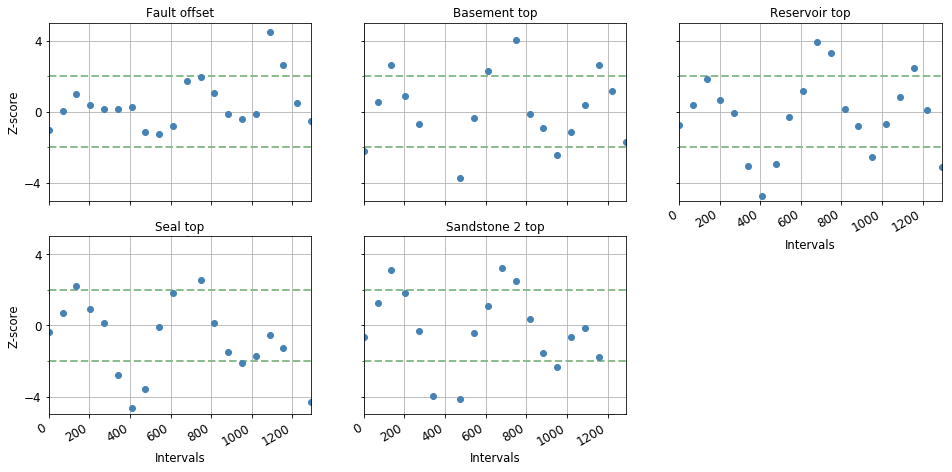

In [382]:
# Cell para geweke plot. Aqui uso pandas matplotlib funcionalidad
# Recuerda que el parametro geweke de aqui abajo es un dataframe
ax = geweke.plot(x = ['Intervals'], # columna intervalo
                 y = geweke.columns[:-1], # Aqui las columnas que quieres to plot.Cada una deberia ser un posterior
                 subplots=True, layout=(2, 3), # Como quieres la grid
                 sharex=True, sharey=True, figsize=(16, 8), grid = False, ylim= (-5,5),
            legend=False, color='steelblue', linewidth = 0.,  marker = 'o');

# Todo esto es para anadir la linea horizontal en -2 y 2. Si los puntos caen alrededor de eso es bueno
for e, c  in enumerate(np.ravel(ax)):
    c.hlines(2, geweke['Intervals'].min(), geweke['Intervals'].max(), linestyles = 'dashed' , color = 'darkseagreen', linewidth=2)
    c.hlines(-2, geweke['Intervals'].min(), geweke['Intervals'].max(), linestyles = 'dashed' , color = 'darkseagreen', linewidth=2)
    c.set_ylabel('Z-score')
    c.yaxis.set_major_locator(plt.MaxNLocator(3))
    c.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    c.yaxis.offsetText.set_fontsize(8)
    c.tick_params(labelsize=12)
    c.grid()
    
    #c.set_ylim(min(-2.5, geweke.iloc[:, e].min()), np.max(2.5, geweke.iloc[:, e].max()))
    c.set_xlim(0,geweke['Intervals'].max())
    try:
        c.set_title(b[e],  fontsize=12)
        #c.set_title(traces.columns[e],  fontsize=12)
    except IndexError:
        continue
        
#plt.savefig('./diagnostic_figures/Geweke_ML5.pdf')
#plt.savefig('./diagnostic_figures/Geweke_ML5.eps')

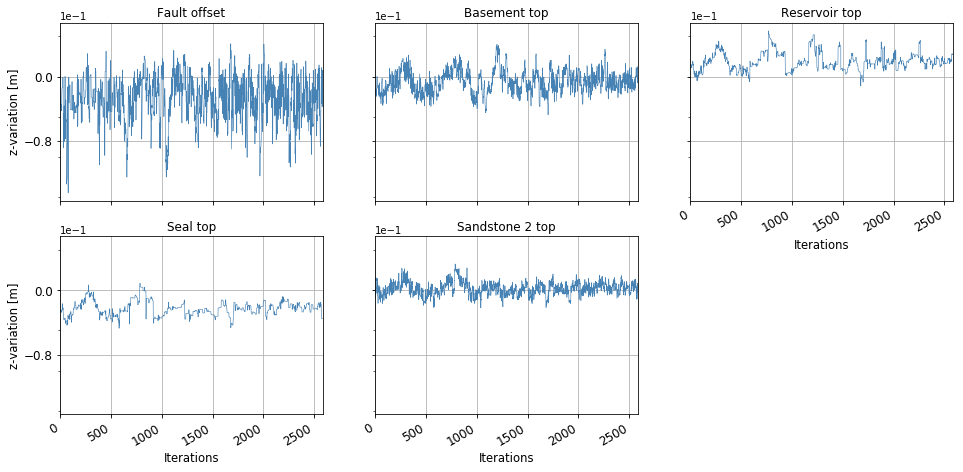

In [383]:
# Misma historia para las trazas
ax = traces.iloc[:, :].plot(subplots=True, layout=(2,3), sharex=True, figsize=(16,8), grid = False,
                 legend=False, sharey=True, color='steelblue', linewidth = 0.6);
c.set_xlabel("Iterations")
for e, c  in enumerate(np.ravel(ax)):
    c.set_ylabel('z-variation [m]')
    c.yaxis.set_major_locator(plt.MaxNLocator(3))
    c.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    c.yaxis.offsetText.set_fontsize(10)
    c.tick_params(labelsize=12)
    c.set_xlabel("Iterations")
    c.grid()
    try:
        c.set_title(b[e],  fontsize=12)
        #c.set_title(traces.columns[e],  fontsize=12)
    except IndexError:
        continue
        
#plt.savefig('./diagnostic_figures/Traces_ML5.pdf')
#plt.savefig('./diagnostic_figures/Traces_ML5.eps')

In [ ]:
#plt.hist(M.trace('structural_model')[:, 0])